## Loading the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import matplotlib.ticker as ticker  # Import ticker module


In [2]:
#read this csv file /Users/tommi/Desktop/Uni_documents/Data/dragon-portfolio/commodity.csv
commodity = pd.read_csv('/Users/tommi/Desktop/Uni_documents/Data/dragon-portfolio/commodity.csv')

#/Users/tommi/Desktop/Uni_documents/Data/dragon-portfolio/EHI640_returns10-02-2025.csv
benchmark_volatility = pd.read_csv('/Users/tommi/Desktop/Uni_documents/Data/dragon-portfolio/EHI640_returns10-02-2025.csv')

#/Users/tommi/Desktop/Uni_documents/Data/dragon-portfolio/equity.csv
equity = pd.read_csv('/Users/tommi/Desktop/Uni_documents/Data/dragon-portfolio/equity.csv')

#/Users/tommi/Desktop/Uni_documents/Data/dragon-portfolio/fixed_income.csv
fixed_income = pd.read_csv('/Users/tommi/Desktop/Uni_documents/Data/dragon-portfolio/fixed_income.csv')

#/Users/tommi/Desktop/Uni_documents/Data/dragon-portfolio/gold.csv
gold = pd.read_csv('/Users/tommi/Desktop/Uni_documents/Data/dragon-portfolio/gold.csv')

#/Users/tommi/Desktop/Uni_documents/Data/dragon-portfolio/volatility-daily.csv
volatility_daily = pd.read_csv('/Users/tommi/Desktop/Uni_documents/Data/dragon-portfolio/volatility-daily.csv')

#read this csv file /Users/tommi/Desktop/Uni_documents/Data/dragon-portfolio/volatility-monthly.csv
volatility_monthly = pd.read_csv('/Users/tommi/Desktop/Uni_documents/Data/dragon-portfolio/volatility-monthly.csv')

vix = pd.read_csv('/Users/tommi/Desktop/Uni_documents/Data/dragon-portfolio/vix_data.csv')
#drop the first two rows of vix
vix = vix.iloc[2:]
#rename the Price column to Dates
vix = vix.rename(columns = {'Price':'Dates'})

#rename the Close column to VIX
vix = vix.rename(columns = {'Close':'VIX'})

#round the VIX column to 2 decimal places
vix['VIX'] = pd.to_numeric(vix['VIX'], errors='coerce')
vix['VIX'] = vix['VIX'].round(2)

In [3]:
# Convert Dates to datetime in all DataFrames (use dayfirst=True to handle different formats)
commodity['Dates'] = pd.to_datetime(commodity['Dates'], dayfirst=True)
equity['Dates'] = pd.to_datetime(equity['Dates'], dayfirst=True)
fixed_income['Dates'] = pd.to_datetime(fixed_income['Dates'], dayfirst=True)
gold['Dates'] = pd.to_datetime(gold['Dates'], dayfirst=True)
vix['Dates'] = pd.to_datetime(vix['Dates'])

#ensure all df start and end at the same date, start at 2006-06-06 and end at 2025-02-07
commodity = commodity[(commodity['Dates'] >= '2006-06-06') & (commodity['Dates'] <= '2025-02-07')]
equity = equity[(equity['Dates'] >= '2006-06-06') & (equity['Dates'] <= '2025-02-07')]
fixed_income = fixed_income[(fixed_income['Dates'] >= '2006-06-06') & (fixed_income['Dates'] <= '2025-02-07')]
gold = gold[(gold['Dates'] >= '2006-06-06') & (gold['Dates'] <= '2025-02-07')]
vix = vix[(vix['Dates'] >= '2006-06-06') & (vix['Dates'] <= '2025-02-07')]


In [4]:
commodity_selected = commodity[['Dates', 'DJP US Equity']].copy()
volatility_selcted = vix[['Dates', 'VIX']].copy()
equity_selected = equity[['Dates', 'IVV US Equity']].copy()
fixed_income_selected = fixed_income[['Dates', 'TLT US Equity']].copy()
gold_selected = gold[['Dates', 'XAU Curncy']].copy()


In [5]:
# Merge DataFrames on Dates using outer join to keep all available data
dragon_portfolio = commodity_selected.merge(volatility_selcted, on='Dates', how='outer')
dragon_portfolio = dragon_portfolio.merge(equity_selected, on='Dates', how='outer')
dragon_portfolio = dragon_portfolio.merge(fixed_income_selected, on='Dates', how='outer')
dragon_portfolio = dragon_portfolio.merge(gold_selected, on='Dates', how='outer')


## Building the Dragon Portfolio

In [6]:
#rename the columns of the dataframe to the following names DJP US Equity to Commodity - DJP US Equity, VIX to Volatility - VIX Index, IVV US Equity to Equities - IVV US Equity, TLT US Equity to Fixed Income - TLT US Equity, XAU Curncy to Gold - XAU Curncy
dragon_portfolio = dragon_portfolio.rename(columns = {'DJP US Equity':'Commodity - DJP US Equity', 'VIX':'Volatility - VIX Index', 'IVV US Equity':'Equities - IVV US Equity', 'TLT US Equity':'Fixed Income - TLT US Equity', 'XAU Curncy':'Gold - XAU Curncy'})

In [7]:
# Display the first rows of the merged DataFrame
dragon_portfolio.head()

,Dates,Commodity - DJP US Equity,Volatility - VIX Index,Equities - IVV US Equity,Fixed Income - TLT US Equity,Gold - XAU Curncy
0,2006-06-06,50.00,17.34,126.92,85.08,630.65
1,2006-06-07,50.20,17.80,126.05,85.10,626.45
2,2006-06-08,49.25,18.35,126.00,85.27,613.25
3,2006-06-09,48.85,18.12,125.60,85.72,607.45
4,2006-06-12,48.80,20.96,124.05,85.79,604.25


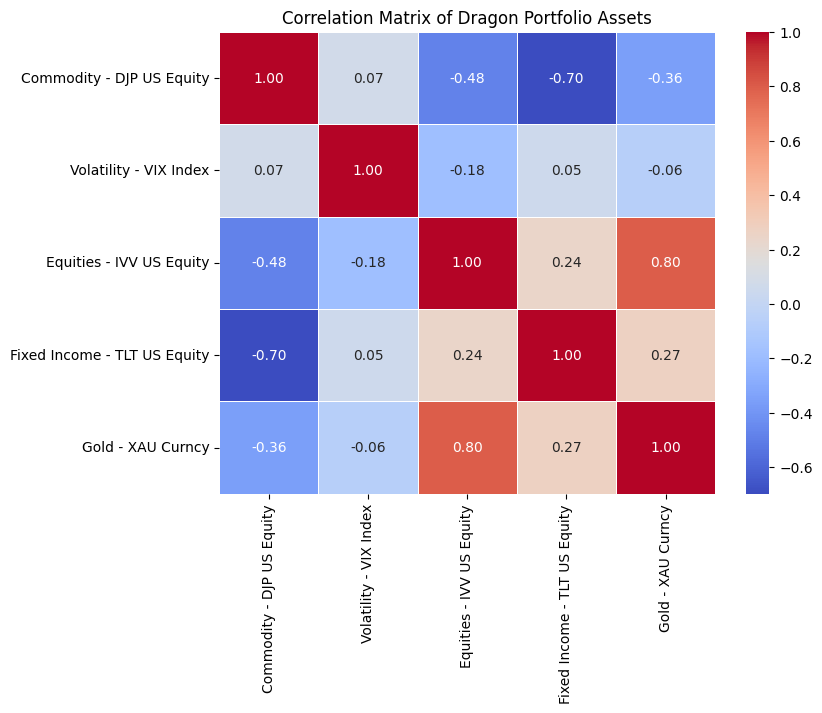

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix (excluding Dates)
correlation_matrix = dragon_portfolio.drop(columns=["Dates"]).corr()

# Set up the figure size
plt.figure(figsize=(8, 6))

# Create a heatmap with annotations
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, cbar=True)

# Add title
plt.title("Correlation Matrix of Dragon Portfolio Assets")

# Show the plot
plt.show()

In [9]:
#print the percetage change betweem first and last date for each asset
commodity_change = ((dragon_portfolio['Commodity - DJP US Equity'].iloc[-1] - dragon_portfolio['Commodity - DJP US Equity'].iloc[0]) / dragon_portfolio['Commodity - DJP US Equity'].iloc[0]) * 100
volatility_change = ((dragon_portfolio['Volatility - VIX Index'].iloc[-1] - dragon_portfolio['Volatility - VIX Index'].iloc[0]) / dragon_portfolio['Volatility - VIX Index'].iloc[0]) * 100
equities_change = ((dragon_portfolio['Equities - IVV US Equity'].iloc[-1] - dragon_portfolio['Equities - IVV US Equity'].iloc[0]) / dragon_portfolio['Equities - IVV US Equity'].iloc[0]) * 100
fixed_income_change = ((dragon_portfolio['Fixed Income - TLT US Equity'].iloc[-1] - dragon_portfolio['Fixed Income - TLT US Equity'].iloc[0]) / dragon_portfolio['Fixed Income - TLT US Equity'].iloc[0]) * 100
gold_change = ((dragon_portfolio['Gold - XAU Curncy'].iloc[-1] - dragon_portfolio['Gold - XAU Curncy'].iloc[0]) / dragon_portfolio['Gold - XAU Curncy'].iloc[0]) * 100

print(f"Commodity - DJP US Equity: {commodity_change:.2f}%")
print(f"Volatility - VIX Index: {volatility_change:.2f}%")
print(f"Equities - IVV US Equity: {equities_change:.2f}%")
print(f"Fixed Income - TLT US Equity: {fixed_income_change:.2f}%")
print(f"Gold - XAU Curncy: {gold_change:.2f}%")





Commodity - DJP US Equity: -31.40%
Volatility - VIX Index: -4.61%
Equities - IVV US Equity: 375.73%
Fixed Income - TLT US Equity: 4.92%
Gold - XAU Curncy: 353.67%


In [10]:
# Convert date column to datetime format
dragon_portfolio['Dates'] = pd.to_datetime(dragon_portfolio['Dates'])
dragon_portfolio.set_index('Dates', inplace=True)

In [11]:
#create a new column called 'Portfolio' which is the weighted sum of the Commodity - DJP US Equity: 18%	Volatility - VIX Index: 21%	Equities - IVV US Equity: 24%	Fixed Income - TLT US Equity: 18%	Gold - XAU Curncy: 19% columns in the dataframe
weights = [0.18, 0.21, 0.24, 0.18, 0.19]



In [12]:
#create a percentage return df from the dragon_portfolio df
percentage_return_df = dragon_portfolio.pct_change()

percentage_return_df['Portfolio'] = (percentage_return_df['Commodity - DJP US Equity'] * weights[0]) + (percentage_return_df['Volatility - VIX Index'] * weights[1]) + (percentage_return_df['Equities - IVV US Equity'] * weights[2]) + (percentage_return_df['Fixed Income - TLT US Equity'] * weights[3]) + (percentage_return_df['Gold - XAU Curncy'] * weights[4])



/var/folders/ly/mr0404x501n5fsqtt6yhhbtm0000gn/T/ipykernel_1392/3601095891.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  percentage_return_df = dragon_portfolio.pct_change()


## Testing the Dragon Portfolio

In [13]:
percentage_return_df.head()

,Commodity - DJP US Equity,Volatility - VIX Index,Equities - IVV US Equity,Fixed Income - TLT US Equity,Gold - XAU Curncy,Portfolio
Dates,,,,,,
2006-06-06,NaN,NaN,NaN,NaN,NaN,NaN
2006-06-07,0.004000,0.026528,-0.006855,0.000235,-0.006660,0.003423
2006-06-08,-0.018924,0.030899,-0.000397,0.001998,-0.021071,-0.000657
2006-06-09,-0.008122,-0.012534,-0.003175,0.005277,-0.009458,-0.005703
2006-06-12,-0.001024,0.156733,-0.012341,0.000817,-0.005268,0.028914


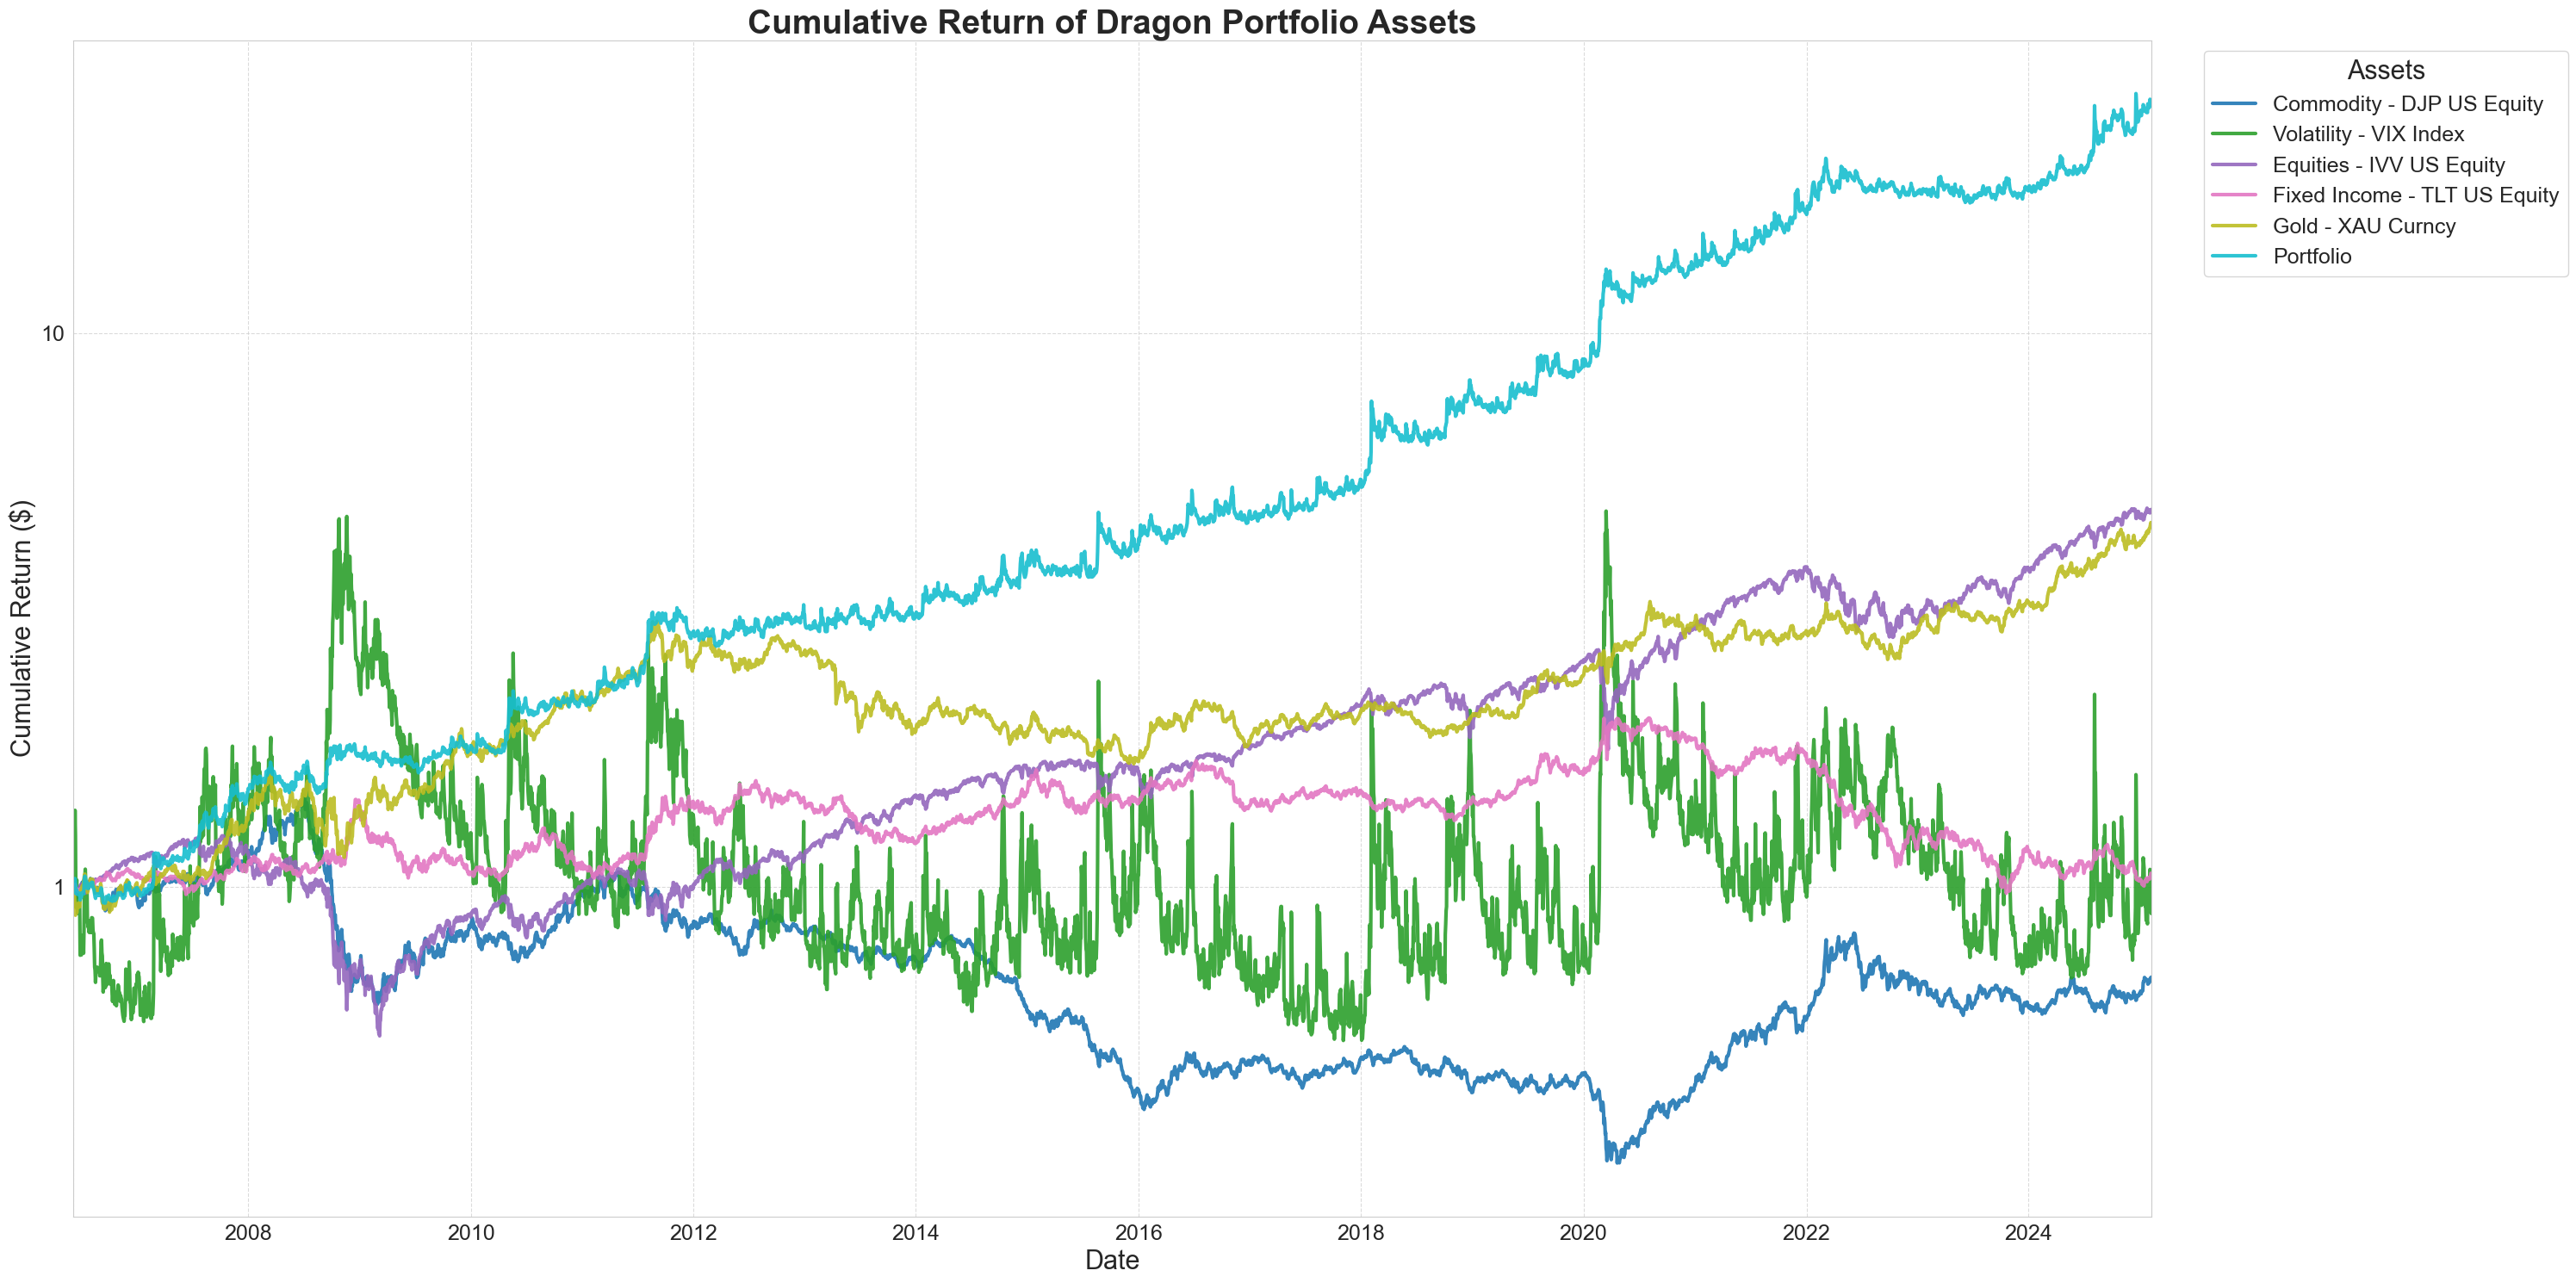

Commodity - DJP US Equity: $0.69
Volatility - VIX Index: $0.95
Equities - IVV US Equity: $4.76
Fixed Income - TLT US Equity: $1.05
Gold - XAU Curncy: $4.54
Portfolio : 26.06


In [14]:

# Set Seaborn style
sns.set_style("whitegrid")

# Figure size
fig, ax = plt.subplots(figsize=(30, 15))

# Cumulative returns (starting from $1)
cumulative_returns = (1 * (1 + percentage_return_df).cumprod())

# Plot
cumulative_returns.plot(ax=ax, linewidth=3, cmap="tab10", alpha=0.9)

# Title and labels
ax.set_title("Cumulative Return of Dragon Portfolio Assets", fontsize=28, fontweight='bold')
ax.set_ylabel("Cumulative Return ($)", fontsize=22)
ax.set_xlabel("Date", fontsize=22)

# Improved Y-axis tick formatting (for log scale)
ax.set_yscale("log")  # Keep the log scale
ax.yaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=10)) # Adjust numticks as needed
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%.0f")) # Format as integers

# Increase tick sizes
ax.tick_params(axis="both", labelsize=18)

# Legend outside the plot
ax.legend(title="Assets", bbox_to_anchor=(1.02, 1), loc="upper left", fontsize=18, title_fontsize=22)

# Grid
ax.grid(True, linestyle="--", alpha=0.7)

# Show plot
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()
#print the final value of the comulative return for each asset
final_value = cumulative_returns.iloc[-1]

print(f"Commodity - DJP US Equity: ${final_value['Commodity - DJP US Equity']:.2f}")
print(f"Volatility - VIX Index: ${final_value['Volatility - VIX Index']:.2f}")
print(f"Equities - IVV US Equity: ${final_value['Equities - IVV US Equity']:.2f}")
print(f"Fixed Income - TLT US Equity: ${final_value['Fixed Income - TLT US Equity']:.2f}")
print(f"Gold - XAU Curncy: ${final_value['Gold - XAU Curncy']:.2f}")
print(f"Portfolio : {final_value['Portfolio']:.2f}")

In [15]:
#calcualte the annualized return of the assets in the percentage_return_df
annualized_return_assets = percentage_return_df.mean() * 252
annualized_return_assets

Commodity - DJP US Equity      -0.004019
Volatility - VIX Index          0.730757
Equities - IVV US Equity        0.098914
Fixed Income - TLT US Equity    0.013556
Gold - XAU Curncy               0.092602
Portfolio                       0.196509
dtype: float64

In [16]:
#calcualte the annualized volatility of the assets in the percentage_return_df
annualized_volatility_assets = percentage_return_df.std() * np.sqrt(252)
annualized_volatility_assets

Commodity - DJP US Equity       0.175600
Volatility - VIX Index          1.261687
Equities - IVV US Equity        0.190775
Fixed Income - TLT US Equity    0.148828
Gold - XAU Curncy               0.169514
Portfolio                       0.238651
dtype: float64

In [17]:
#calcualte the standard deviation of the assets in the percentage_return_df
standard_deviation_assets = percentage_return_df.std()
standard_deviation_assets

Commodity - DJP US Equity       0.011062
Volatility - VIX Index          0.079479
Equities - IVV US Equity        0.012018
Fixed Income - TLT US Equity    0.009375
Gold - XAU Curncy               0.010678
Portfolio                       0.015034
dtype: float64

In [18]:
def calculate_total_percentage_change(series):
    """Calculates total percentage change, handling NaNs correctly."""

    if series.empty:  # Handle empty series
        return np.nan

    # Drop NaN values *before* calculating the product
    valid_series = series.dropna()

    if valid_series.empty: # if after dropping nan, the series is empty, return nan
        return np.nan

    if (valid_series == 0).all(): # all zeros
        return 0


    multipliers = 1 + valid_series
    overall_change_factor = multipliers.prod()
    total_change = (overall_change_factor - 1) * 100
    return total_change

def calculate_total_percentage_change_dataframe(df):
    """Calculates total percentage change for each column."""
    return df.apply(calculate_total_percentage_change, axis=0)


# ... (Your DataFrame creation code remains the same) ...

total_changes = calculate_total_percentage_change_dataframe(percentage_return_df)
print(total_changes)
# print(total_changes)

Commodity - DJP US Equity        -31.400000
Volatility - VIX Index            -4.613610
Equities - IVV US Equity         375.732745
Fixed Income - TLT US Equity       4.924777
Gold - XAU Curncy                353.670023
Portfolio                       2505.647137
dtype: float64


## Dragon Portfolio No Commodities

In [19]:
#add a column to the percentage_return_df called Portfolio - No Commodities which is the weighted sum of the Volatility - VIX Index: 25.5%	Equities - IVV US Equity: 28.5%	Fixed Income - TLT US Equity: 22.5%	Gold - XAU Curncy: 23.5% columns in the dataframe
weights_no_commodities = [0, 0.255, 0.285, 0.225, 0.235]

percentage_return_df['Portfolio - No Commodities'] = (percentage_return_df['Volatility - VIX Index'] * weights_no_commodities[1]) + (percentage_return_df['Equities - IVV US Equity'] * weights_no_commodities[2]) + (percentage_return_df['Fixed Income - TLT US Equity'] * weights_no_commodities[3]) + (percentage_return_df['Gold - XAU Curncy'] * weights_no_commodities[4])

percentage_return_df.head()

,Commodity - DJP US Equity,Volatility - VIX Index,Equities - IVV US Equity,Fixed Income - TLT US Equity,Gold - XAU Curncy,Portfolio,Portfolio - No Commodities
Dates,,,,,,,
2006-06-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-06-07,0.004000,0.026528,-0.006855,0.000235,-0.006660,0.003423,0.003299
2006-06-08,-0.018924,0.030899,-0.000397,0.001998,-0.021071,-0.000657,0.003264
2006-06-09,-0.008122,-0.012534,-0.003175,0.005277,-0.009458,-0.005703,-0.005136
2006-06-12,-0.001024,0.156733,-0.012341,0.000817,-0.005268,0.028914,0.035396


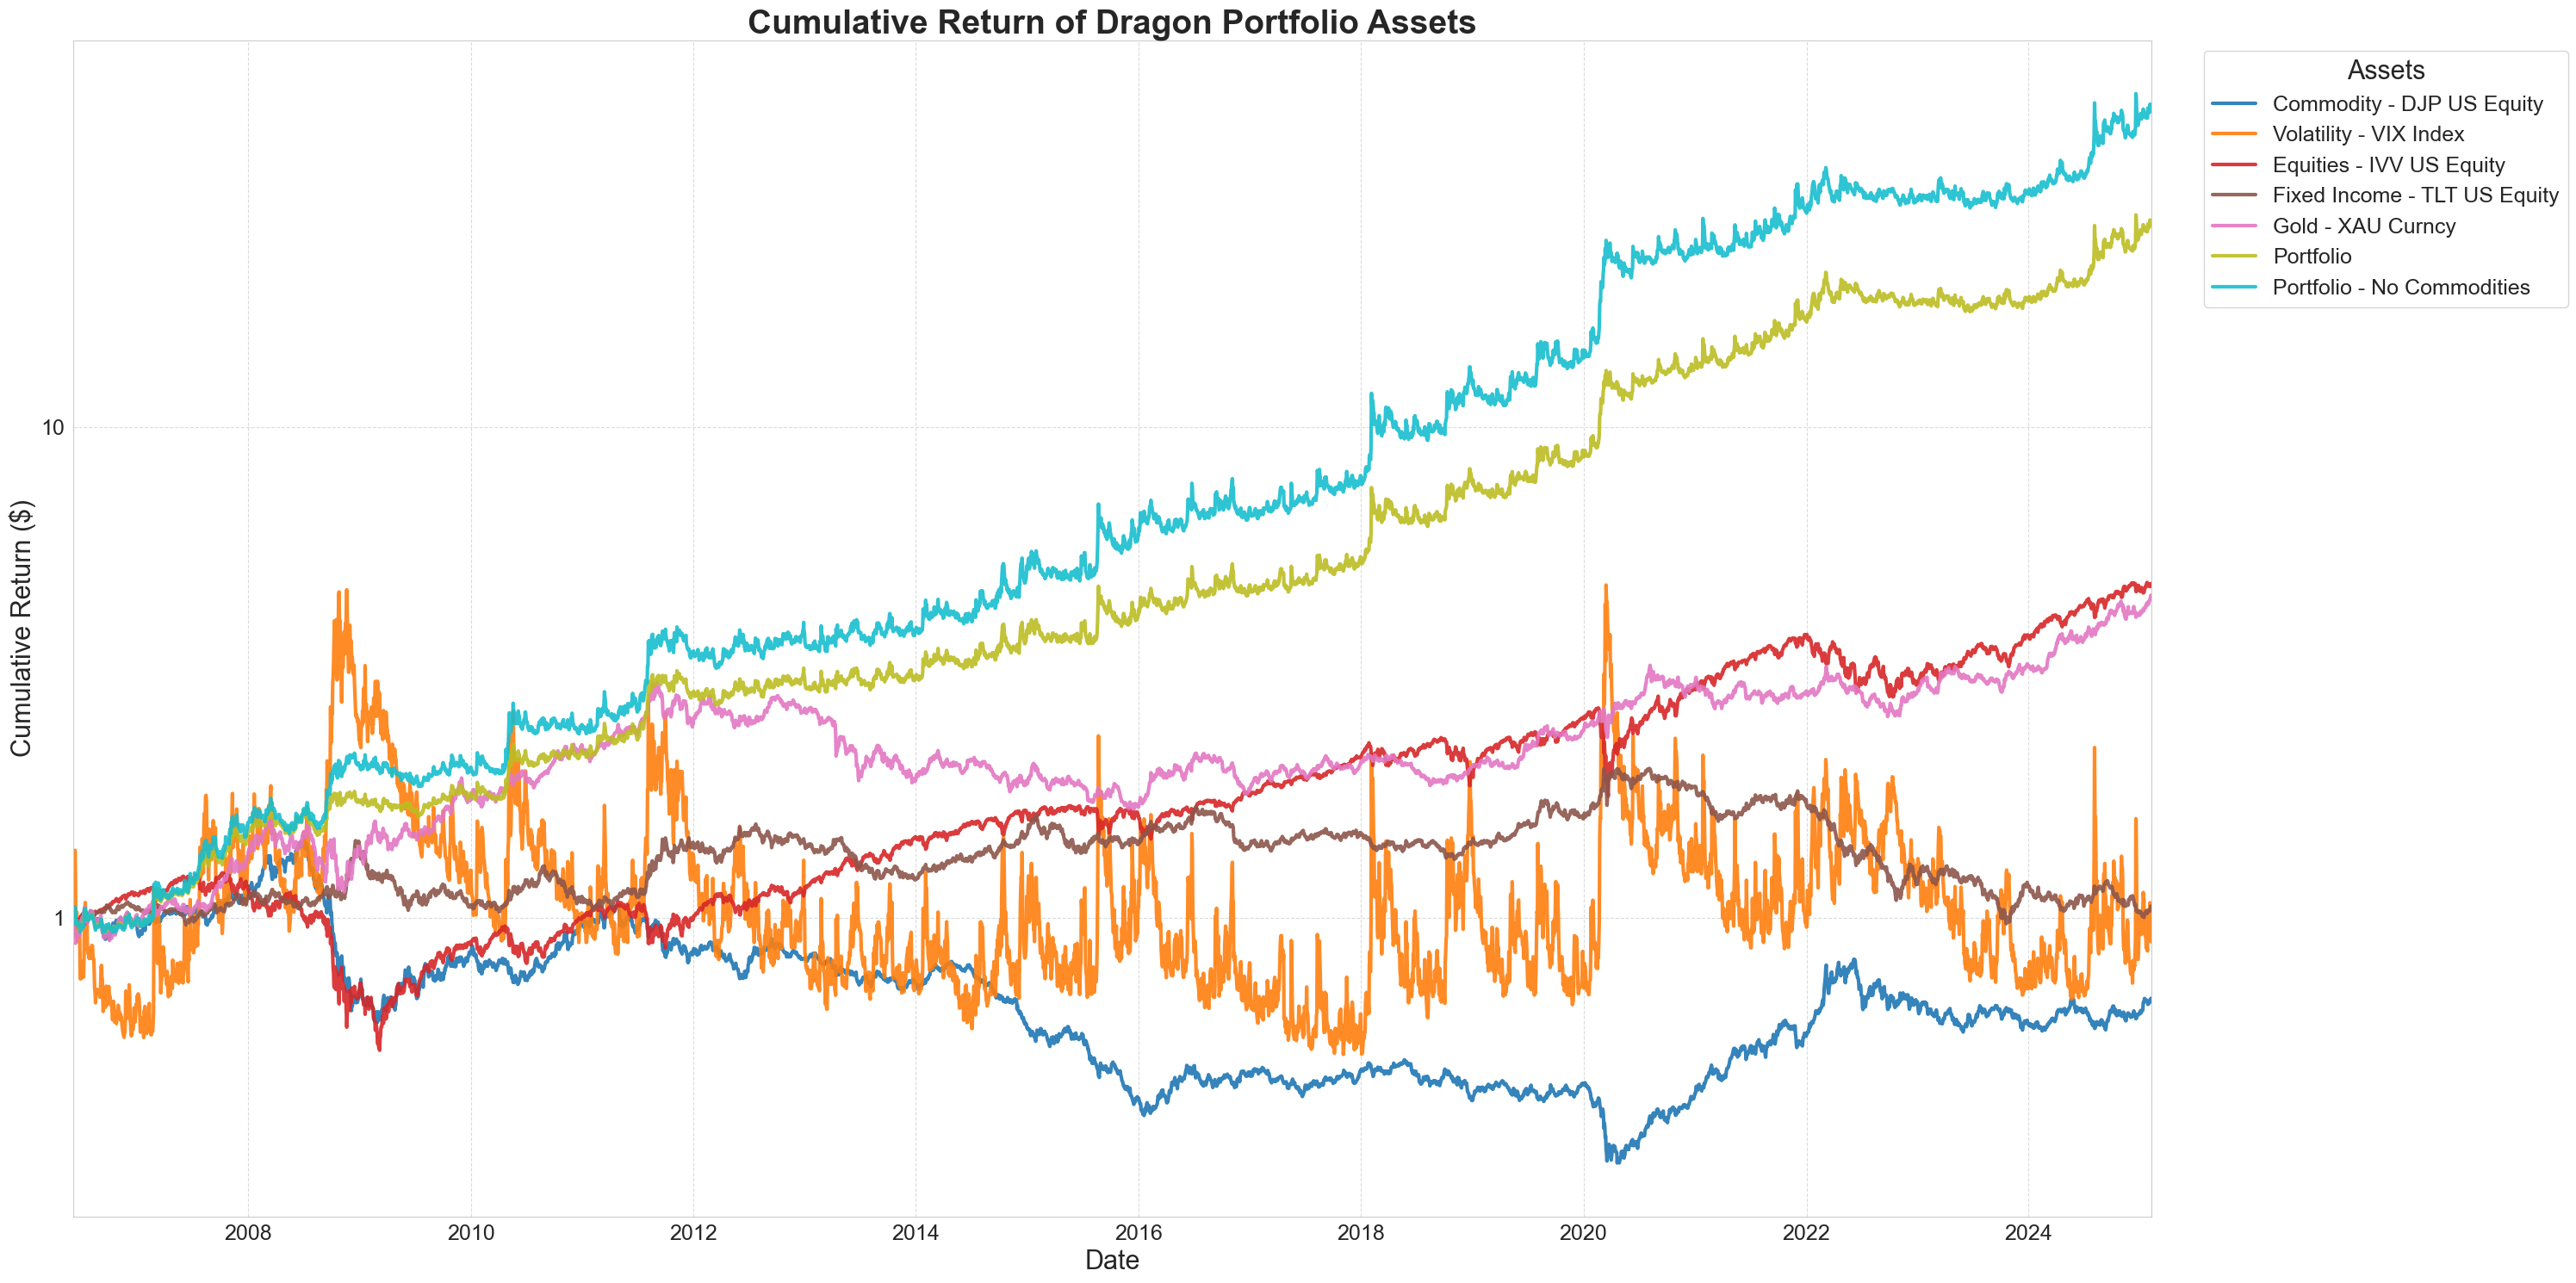

Commodity - DJP US Equity        0.686000
Volatility - VIX Index           0.953864
Equities - IVV US Equity         4.757327
Fixed Income - TLT US Equity     1.049248
Gold - XAU Curncy                4.536700
Portfolio                       26.056471
Portfolio - No Commodities      44.644195
Name: 2025-02-07 00:00:00, dtype: float64

In [20]:

# Set Seaborn style
sns.set_style("whitegrid")

# Figure size
fig, ax = plt.subplots(figsize=(30, 15))

# Cumulative returns (starting from $1)
cumulative_returns = (1 * (1 + percentage_return_df).cumprod())

# Plot
cumulative_returns.plot(ax=ax, linewidth=3, cmap="tab10", alpha=0.9)

# Title and labels
ax.set_title("Cumulative Return of Dragon Portfolio Assets", fontsize=28, fontweight='bold')
ax.set_ylabel("Cumulative Return ($)", fontsize=22)
ax.set_xlabel("Date", fontsize=22)

# Improved Y-axis tick formatting (for log scale)
ax.set_yscale("log")  # Keep the log scale
ax.yaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=10)) # Adjust numticks as needed
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%.0f")) # Format as integers

# Increase tick sizes
ax.tick_params(axis="both", labelsize=18)

# Legend outside the plot
ax.legend(title="Assets", bbox_to_anchor=(1.02, 1), loc="upper left", fontsize=18, title_fontsize=22)

# Grid
ax.grid(True, linestyle="--", alpha=0.7)

# Show plot
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()
#print the final value of the comulative return for each asset
final_value = cumulative_returns.iloc[-1]

final_value

In [21]:
#calcualte the annualized return of the assets in the percentage_return_df
annualized_return_assets = percentage_return_df.mean() * 252
annualized_return_assets

Commodity - DJP US Equity      -0.004019
Volatility - VIX Index          0.730757
Equities - IVV US Equity        0.098914
Fixed Income - TLT US Equity    0.013556
Gold - XAU Curncy               0.092602
Portfolio                       0.196509
Portfolio - No Commodities      0.239345
dtype: float64

In [22]:
#calcualte the annualized volatility of the assets in the percentage_return_df
annualized_volatility_assets = percentage_return_df.std() * np.sqrt(252)
annualized_volatility_assets

Commodity - DJP US Equity       0.175600
Volatility - VIX Index          1.261687
Equities - IVV US Equity        0.190775
Fixed Income - TLT US Equity    0.148828
Gold - XAU Curncy               0.169514
Portfolio                       0.238651
Portfolio - No Commodities      0.296684
dtype: float64

In [23]:
#calcualte the standard deviation of the assets in the percentage_return_df
standard_deviation_assets = percentage_return_df.std()
standard_deviation_assets

Commodity - DJP US Equity       0.011062
Volatility - VIX Index          0.079479
Equities - IVV US Equity        0.012018
Fixed Income - TLT US Equity    0.009375
Gold - XAU Curncy               0.010678
Portfolio                       0.015034
Portfolio - No Commodities      0.018689
dtype: float64

In [24]:
def calculate_total_percentage_change(series):
    """Calculates total percentage change, handling NaNs correctly."""

    if series.empty:  # Handle empty series
        return np.nan

    # Drop NaN values *before* calculating the product
    valid_series = series.dropna()

    if valid_series.empty: # if after dropping nan, the series is empty, return nan
        return np.nan

    if (valid_series == 0).all(): # all zeros
        return 0


    multipliers = 1 + valid_series
    overall_change_factor = multipliers.prod()
    total_change = (overall_change_factor - 1) * 100
    return total_change

def calculate_total_percentage_change_dataframe(df):
    """Calculates total percentage change for each column."""
    return df.apply(calculate_total_percentage_change, axis=0)


# ... (Your DataFrame creation code remains the same) ...

total_changes = calculate_total_percentage_change_dataframe(percentage_return_df)
print(total_changes)
# print(total_changes)

Commodity - DJP US Equity        -31.400000
Volatility - VIX Index            -4.613610
Equities - IVV US Equity         375.732745
Fixed Income - TLT US Equity       4.924777
Gold - XAU Curncy                353.670023
Portfolio                       2505.647137
Portfolio - No Commodities      4364.419463
dtype: float64


## Introducing Other Portfolios

In [25]:
#dragon portfolio reset index
dragon_portfolio.reset_index(inplace=True)
#create the 60/40 portfolio by taking the Equities - IVV US Equity and Fixed Income - TLT US Equity columns from the dragon_portfolio df
portfolio_60_40 = dragon_portfolio[['Dates','Equities - IVV US Equity', 'Fixed Income - TLT US Equity']].copy()

#load the /Users/tommi/Desktop/Uni_documents/Data/dragon-portfolio/Intermediate_Term_Bonds.csv
intermediate_term_bonds = pd.read_csv('/Users/tommi/Desktop/Uni_documents/Data/dragon-portfolio/Intermediate_Term_Bonds.csv')

#dates to datetime
intermediate_term_bonds['Dates'] = pd.to_datetime(intermediate_term_bonds['Dates'], dayfirst=True)

#ensure the df start and end at the same date, start at 2006-06-06 and end at 2025-02-07
intermediate_term_bonds = intermediate_term_bonds[(intermediate_term_bonds['Dates'] >= '2006-06-06') & (intermediate_term_bonds['Dates'] <= '2025-02-07')]

#create the all weather portoflio by taking equity, bond, gold and commodity from the dragon_portfolio df
portfolio_all_weather = dragon_portfolio[['Dates','Equities - IVV US Equity', 'Fixed Income - TLT US Equity', 'Gold - XAU Curncy', 'Commodity - DJP US Equity']].copy()

#merge the portfolio_all_weather with the intermediate_term_bonds df on the Dates column
portfolio_all_weather = portfolio_all_weather.merge(intermediate_term_bonds, on='Dates', how='outer')

#change the name of the column IEF US Equity to Intermediate Term Bonds - IEF US Equity 
portfolio_all_weather = portfolio_all_weather.rename(columns = {'IEF US Equity':'Intermediate Term Bonds - IEF US Equity'})

# change Fixed Income - TLT US Equity to Long Term Bonds - TLT US Equity
portfolio_all_weather = portfolio_all_weather.rename(columns = {'Fixed Income - TLT US Equity':'Long Term Bonds - TLT US Equity'})

In [26]:
portfolio_all_weather.head()

,Dates,Equities - IVV US Equity,Long Term Bonds - TLT US Equity,Gold - XAU Curncy,Commodity - DJP US Equity,Intermediate Term Bonds - IEF US Equity
0,2006-06-06,126.92,85.08,630.65,50.00,80.80
1,2006-06-07,126.05,85.10,626.45,50.20,80.69
2,2006-06-08,126.00,85.27,613.25,49.25,80.80
3,2006-06-09,125.60,85.72,607.45,48.85,81.00
4,2006-06-12,124.05,85.79,604.25,48.80,80.96


In [27]:
# Convert date column to datetime format
portfolio_60_40['Dates'] = pd.to_datetime(portfolio_60_40['Dates'])
portfolio_60_40.set_index('Dates', inplace=True)

# Convert date column to datetime format
portfolio_all_weather['Dates'] = pd.to_datetime(portfolio_all_weather['Dates'])
portfolio_all_weather.set_index('Dates', inplace=True)

In [28]:
#create a percentage return df from the portfolio_60_40 df
percentage_return_60_40 = portfolio_60_40.pct_change()

percentage_return_60_40['Portfolio'] = (percentage_return_60_40['Equities - IVV US Equity'] * 0.6) + (percentage_return_60_40['Fixed Income - TLT US Equity'] * 0.4)

#create a percentage return df from the portfolio_all_weather df
percentage_return_all_weather = portfolio_all_weather.pct_change()

percentage_return_all_weather['Portfolio'] = (percentage_return_all_weather['Equities - IVV US Equity'] * 0.3) + (percentage_return_all_weather['Long Term Bonds - TLT US Equity'] * 0.4) + (percentage_return_all_weather['Gold - XAU Curncy'] * 0.075) + (percentage_return_all_weather['Commodity - DJP US Equity'] * 0.075) + (percentage_return_all_weather['Intermediate Term Bonds - IEF US Equity'] * 0.15)

In [29]:
percentage_return_60_40.head()

,Equities - IVV US Equity,Fixed Income - TLT US Equity,Portfolio
Dates,,,
2006-06-06,NaN,NaN,NaN
2006-06-07,-0.006855,0.000235,-0.004019
2006-06-08,-0.000397,0.001998,0.000561
2006-06-09,-0.003175,0.005277,0.000206
2006-06-12,-0.012341,0.000817,-0.007078


In [30]:
percentage_return_all_weather.head()

,Equities - IVV US Equity,Long Term Bonds - TLT US Equity,Gold - XAU Curncy,Commodity - DJP US Equity,Intermediate Term Bonds - IEF US Equity,Portfolio
Dates,,,,,,
2006-06-06,NaN,NaN,NaN,NaN,NaN,NaN
2006-06-07,-0.006855,0.000235,-0.006660,0.004000,-0.001361,-0.002366
2006-06-08,-0.000397,0.001998,-0.021071,-0.018924,0.001363,-0.002115
2006-06-09,-0.003175,0.005277,-0.009458,-0.008122,0.002475,0.000211
2006-06-12,-0.012341,0.000817,-0.005268,-0.001024,-0.000494,-0.003922


In [31]:
#calcualte the annualized return of the assets in the percentage_return_df
annualized_return_assets = percentage_return_60_40.mean() * 252
annualized_return_assets

Equities - IVV US Equity        0.098914
Fixed Income - TLT US Equity    0.013556
Portfolio                       0.064771
dtype: float64

In [32]:
#calcualte the annualized return of the assets in the percentage_return_df
annualized_return_assets = percentage_return_all_weather.mean() * 252
annualized_return_assets

Equities - IVV US Equity                   0.098914
Long Term Bonds - TLT US Equity            0.013556
Gold - XAU Curncy                          0.092602
Commodity - DJP US Equity                 -0.004019
Intermediate Term Bonds - IEF US Equity    0.009718
Portfolio                                  0.043198
dtype: float64

In [33]:
#calcualte the standard deviation of the assets in the percentage_return_df
standard_deviation_assets = percentage_return_60_40.std()
standard_deviation_assets

Equities - IVV US Equity        0.012018
Fixed Income - TLT US Equity    0.009375
Portfolio                       0.006931
dtype: float64

In [34]:
#calcualte the standard deviation of the assets in the percentage_return_df
standard_deviation_assets = percentage_return_all_weather.std()
standard_deviation_assets

Equities - IVV US Equity                   0.012018
Long Term Bonds - TLT US Equity            0.009375
Gold - XAU Curncy                          0.010678
Commodity - DJP US Equity                  0.011062
Intermediate Term Bonds - IEF US Equity    0.004337
Portfolio                                  0.005092
dtype: float64

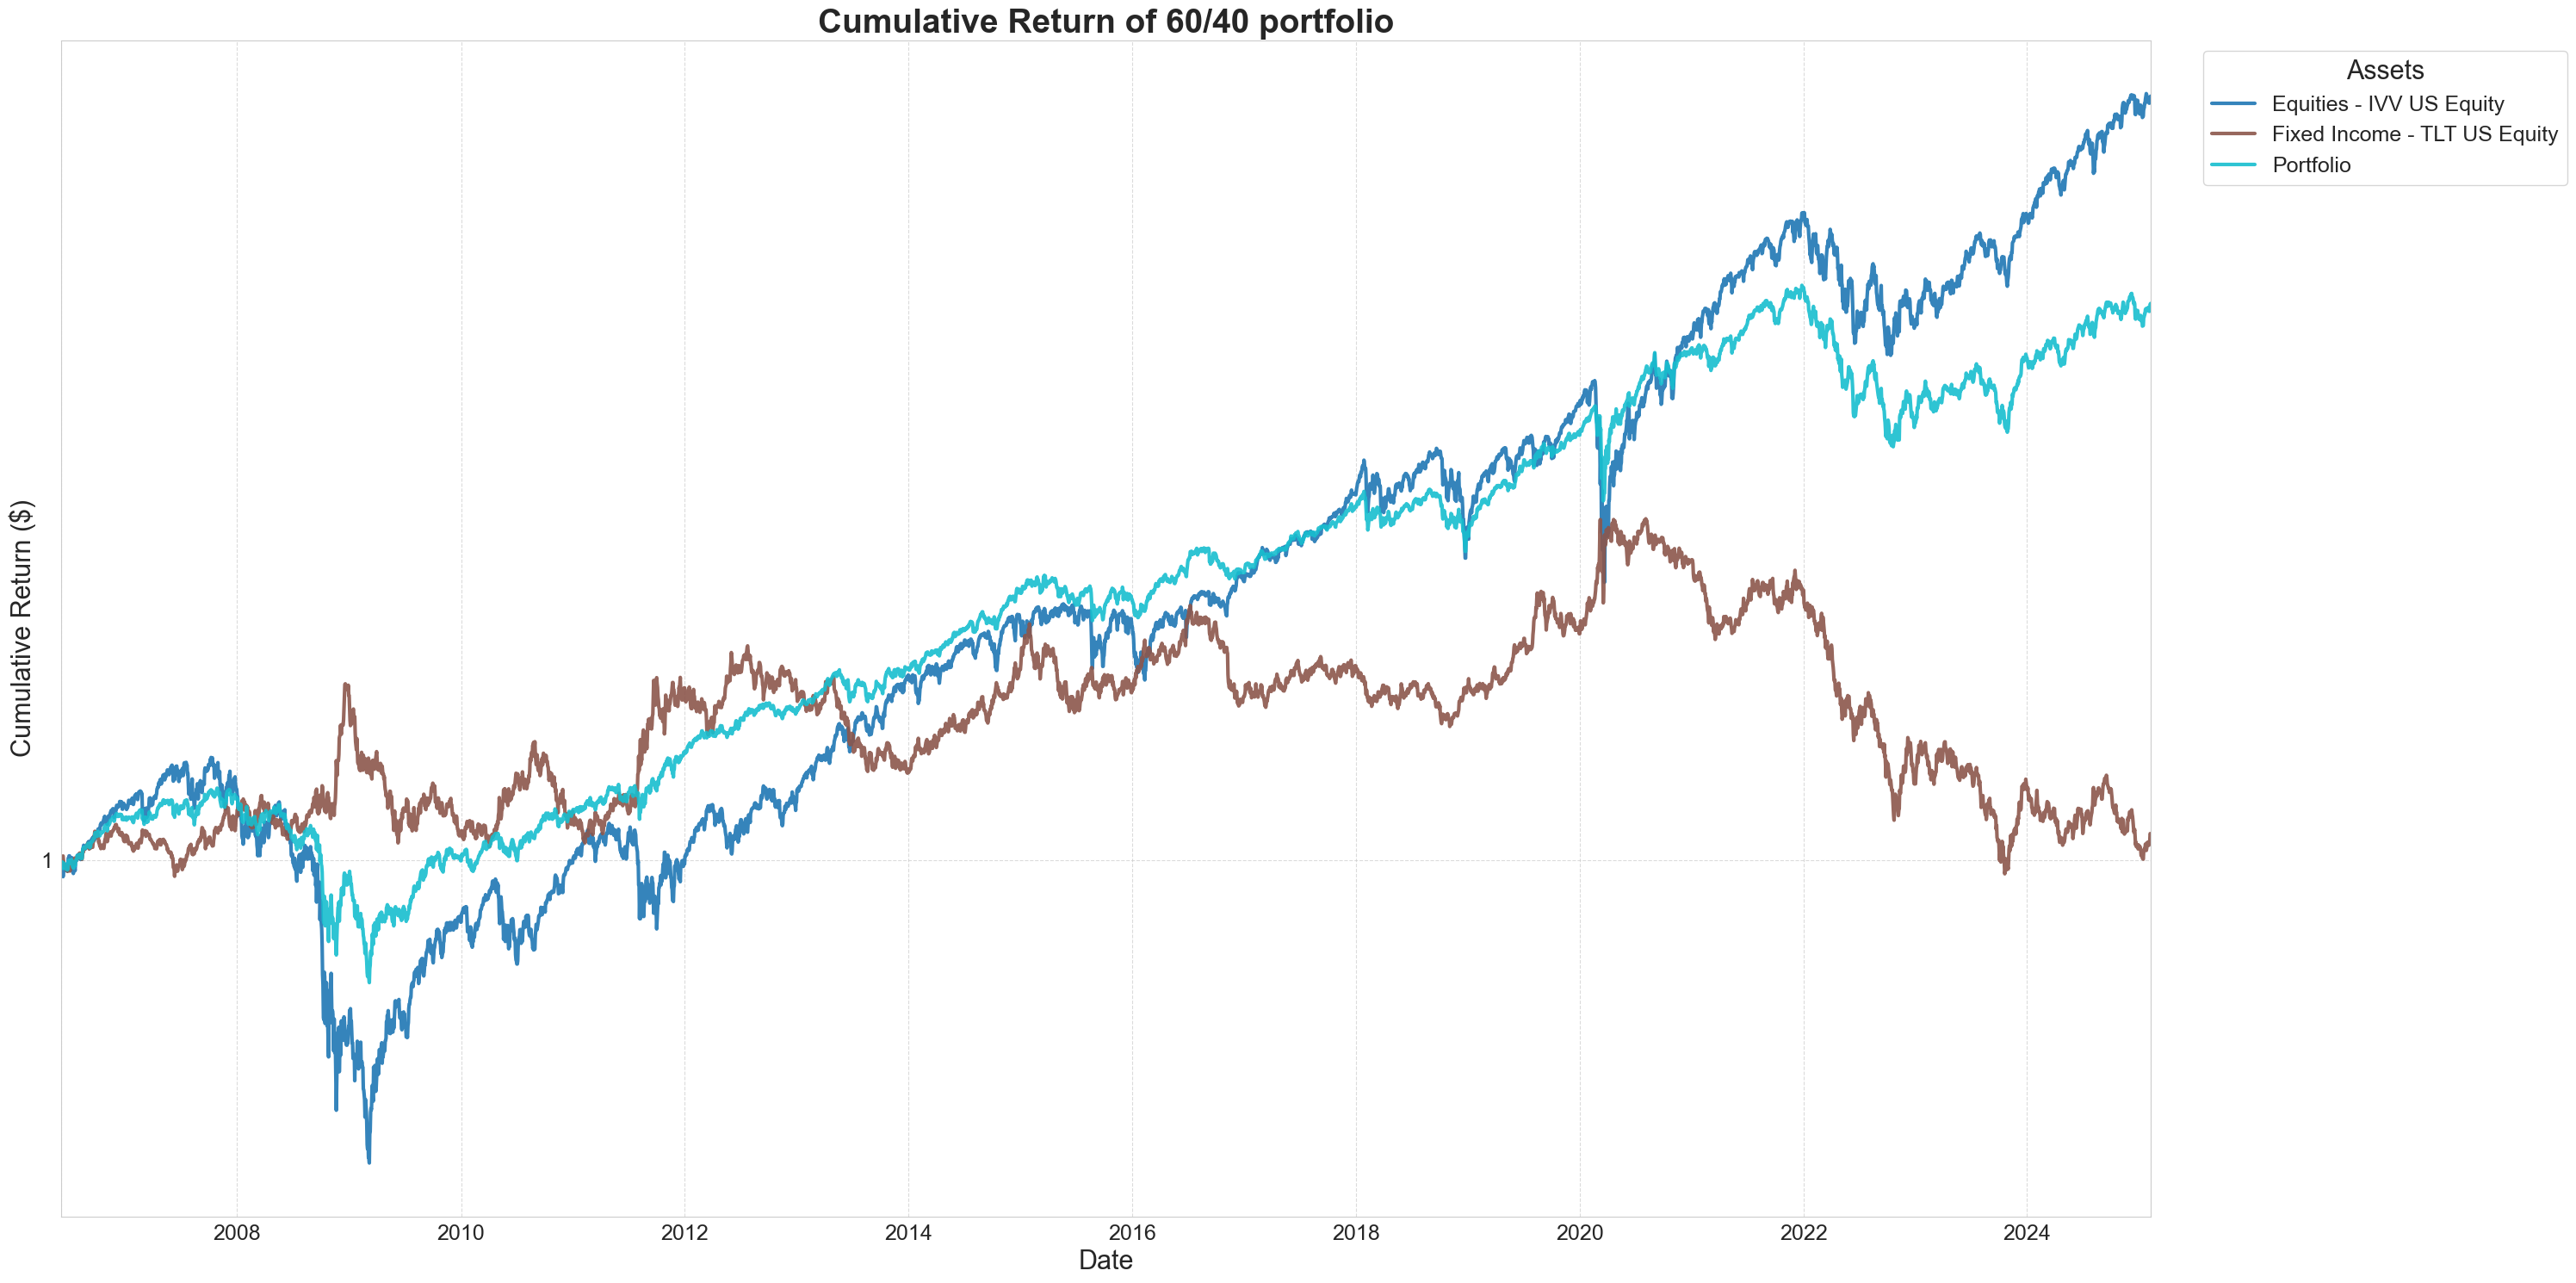

Equities - IVV US Equity        4.757327
Fixed Income - TLT US Equity    1.049248
Portfolio                       3.111917
Name: 2025-02-07 00:00:00, dtype: float64

In [35]:
# Set Seaborn style
sns.set_style("whitegrid")

# Figure size
fig, ax = plt.subplots(figsize=(30, 15))

# Cumulative returns (starting from $1)
cumulative_returns = (1 * (1 + percentage_return_60_40).cumprod())

# Plot
cumulative_returns.plot(ax=ax, linewidth=3, cmap="tab10", alpha=0.9)

# Title and labels
ax.set_title("Cumulative Return of 60/40 portfolio", fontsize=28, fontweight='bold')
ax.set_ylabel("Cumulative Return ($)", fontsize=22)
ax.set_xlabel("Date", fontsize=22)

# Improved Y-axis tick formatting (for log scale)
ax.set_yscale("log")  # Keep the log scale
ax.yaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=10)) # Adjust numticks as needed
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%.0f")) # Format as integers

# Increase tick sizes
ax.tick_params(axis="both", labelsize=18)

# Legend outside the plot
ax.legend(title="Assets", bbox_to_anchor=(1.02, 1), loc="upper left", fontsize=18, title_fontsize=22)

# Grid
ax.grid(True, linestyle="--", alpha=0.7)

# Show plot
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()
#print the final value of the comulative return for each asset
final_value = cumulative_returns.iloc[-1]

final_value

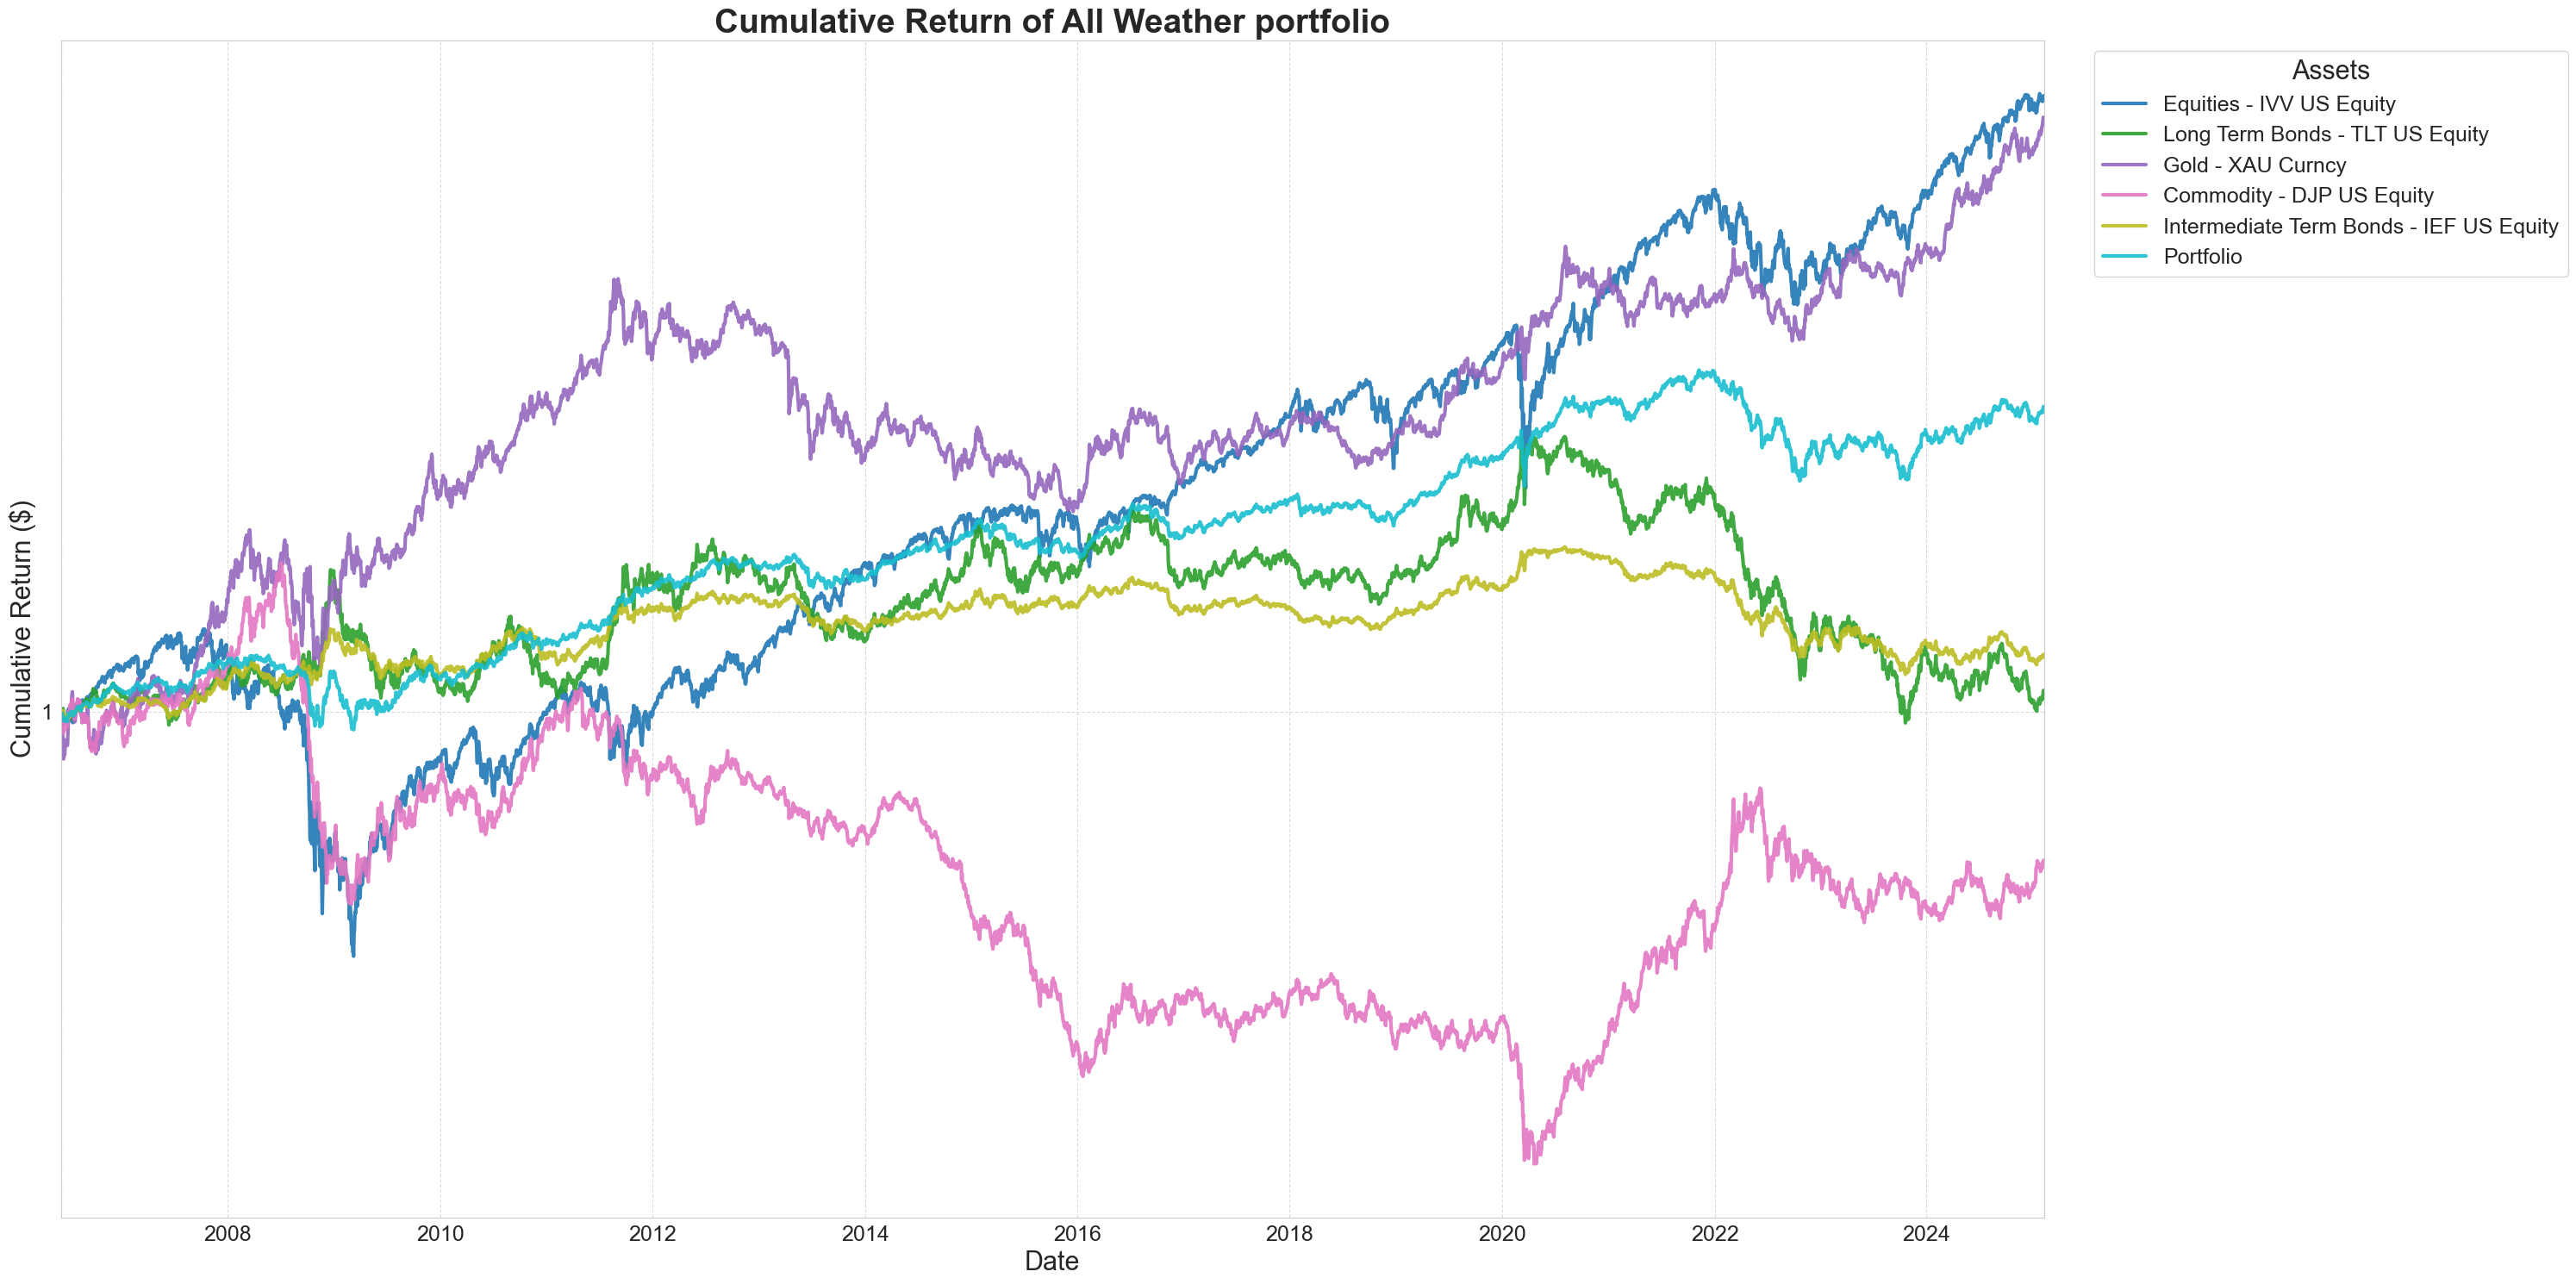

Equities - IVV US Equity                   4.757327
Long Term Bonds - TLT US Equity            1.049248
Gold - XAU Curncy                          4.536700
Commodity - DJP US Equity                  0.686000
Intermediate Term Bonds - IEF US Equity    1.152723
Portfolio                                  2.164256
Name: 2025-02-07 00:00:00, dtype: float64

In [36]:
# Set Seaborn style
sns.set_style("whitegrid")

# Figure size
fig, ax = plt.subplots(figsize=(30, 15))

# Cumulative returns (starting from $1)
cumulative_returns = (1 * (1 + percentage_return_all_weather).cumprod())

# Plot
cumulative_returns.plot(ax=ax, linewidth=3, cmap="tab10", alpha=0.9)

# Title and labels
ax.set_title("Cumulative Return of All Weather portfolio", fontsize=28, fontweight='bold')
ax.set_ylabel("Cumulative Return ($)", fontsize=22)
ax.set_xlabel("Date", fontsize=22)

# Improved Y-axis tick formatting (for log scale)
ax.set_yscale("log")  # Keep the log scale
ax.yaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=10)) # Adjust numticks as needed
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%.0f")) # Format as integers

# Increase tick sizes
ax.tick_params(axis="both", labelsize=18)

# Legend outside the plot
ax.legend(title="Assets", bbox_to_anchor=(1.02, 1), loc="upper left", fontsize=18, title_fontsize=22)

# Grid
ax.grid(True, linestyle="--", alpha=0.7)

# Show plot
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()
#print the final value of the comulative return for each asset
final_value = cumulative_returns.iloc[-1]

final_value

In [37]:
def calculate_total_percentage_change(series):
    """Calculates total percentage change, handling NaNs correctly."""

    if series.empty:  # Handle empty series
        return np.nan

    # Drop NaN values *before* calculating the product
    valid_series = series.dropna()

    if valid_series.empty: # if after dropping nan, the series is empty, return nan
        return np.nan

    if (valid_series == 0).all(): # all zeros
        return 0


    multipliers = 1 + valid_series
    overall_change_factor = multipliers.prod()
    total_change = (overall_change_factor - 1) * 100
    return total_change

def calculate_total_percentage_change_dataframe(df):
    """Calculates total percentage change for each column."""
    return df.apply(calculate_total_percentage_change, axis=0)


total_changes = calculate_total_percentage_change_dataframe(percentage_return_60_40)
print(total_changes)

Equities - IVV US Equity        375.732745
Fixed Income - TLT US Equity      4.924777
Portfolio                       211.191656
dtype: float64


In [38]:
def calculate_total_percentage_change(series):
    """Calculates total percentage change, handling NaNs correctly."""

    if series.empty:  # Handle empty series
        return np.nan

    # Drop NaN values *before* calculating the product
    valid_series = series.dropna()

    if valid_series.empty: # if after dropping nan, the series is empty, return nan
        return np.nan

    if (valid_series == 0).all(): # all zeros
        return 0


    multipliers = 1 + valid_series
    overall_change_factor = multipliers.prod()
    total_change = (overall_change_factor - 1) * 100
    return total_change

def calculate_total_percentage_change_dataframe(df):
    """Calculates total percentage change for each column."""
    return df.apply(calculate_total_percentage_change, axis=0)


total_changes = calculate_total_percentage_change_dataframe(percentage_return_all_weather)
print(total_changes)

Equities - IVV US Equity                   375.732745
Long Term Bonds - TLT US Equity              4.924777
Gold - XAU Curncy                          353.670023
Commodity - DJP US Equity                  -31.400000
Intermediate Term Bonds - IEF US Equity     15.272277
Portfolio                                  116.425630
dtype: float64


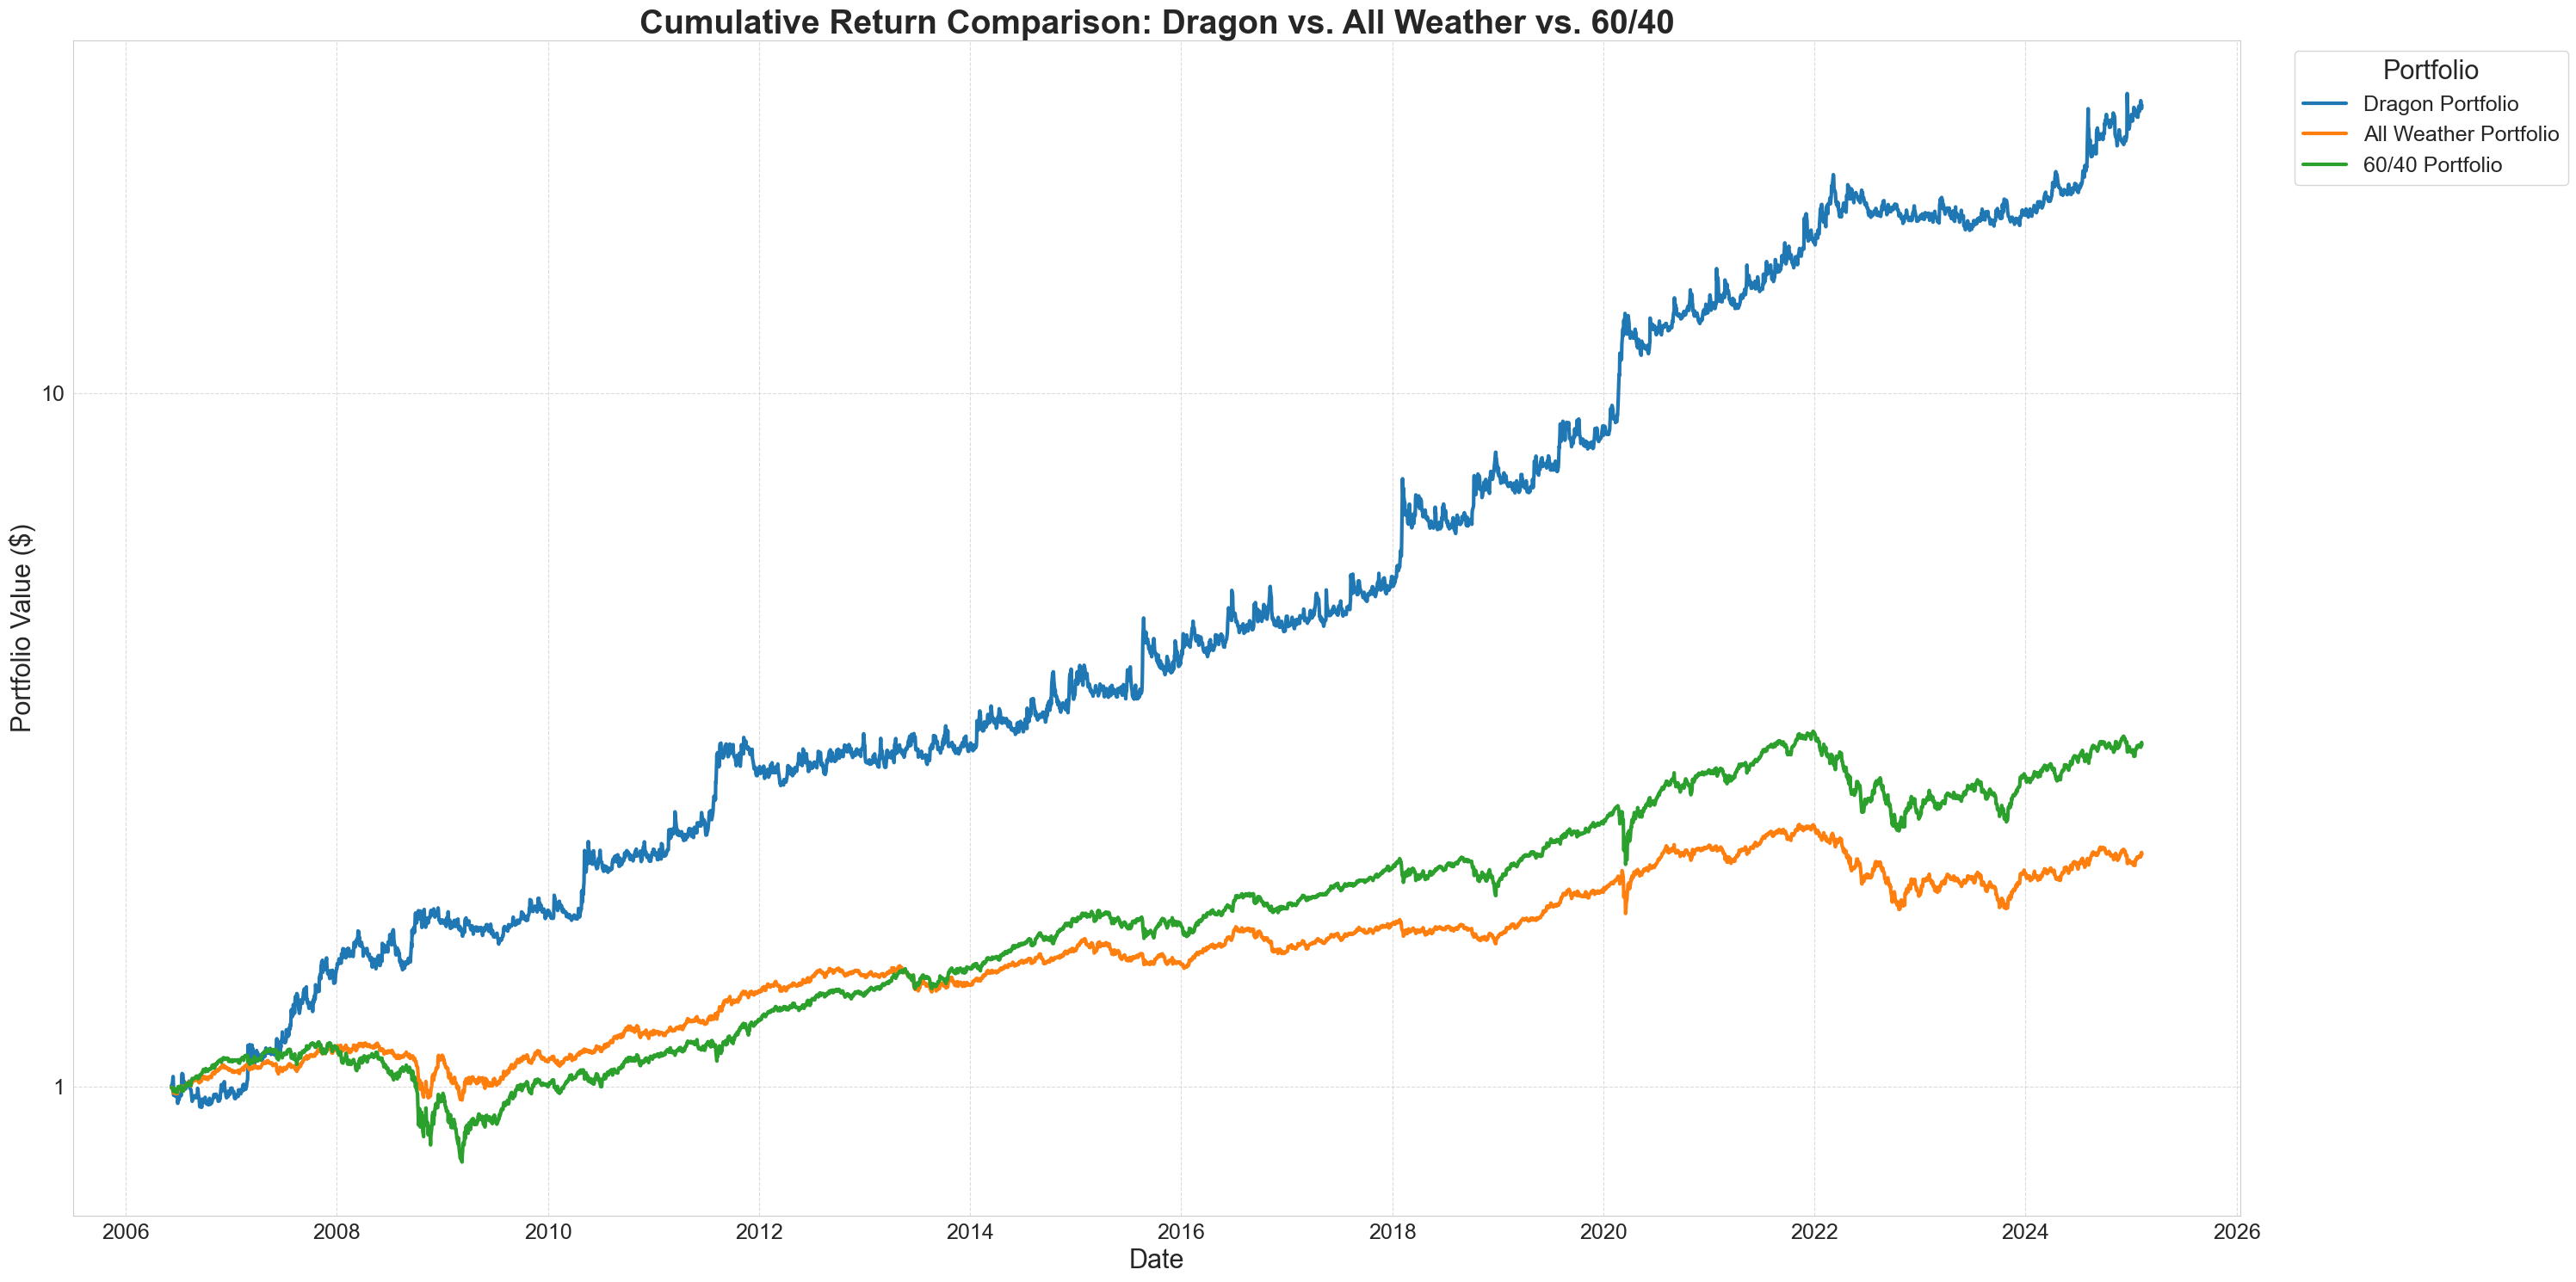

Dragon Portfolio Final Value: $26.06
All Weather Portfolio Final Value: $2.16
60/40 Portfolio Final Value: $3.11


In [42]:
# Set Seaborn style
sns.set_style("whitegrid")

# Compute cumulative portfolio values using only the "Portfolio" column
cumulative_dragon = (1 + percentage_return_df["Portfolio"]).cumprod()
cumulative_all_weather = (1 + percentage_return_all_weather["Portfolio"]).cumprod()
cumulative_60_40 = (1 + percentage_return_60_40["Portfolio"]).cumprod()

# Figure setup
fig, ax = plt.subplots(figsize=(30, 15))

# Plot only the "Portfolio" column for each dataset
ax.plot(cumulative_dragon, label="Dragon Portfolio", linewidth=3)
ax.plot(cumulative_all_weather, label="All Weather Portfolio", linewidth=3)
ax.plot(cumulative_60_40, label="60/40 Portfolio", linewidth=3)

# Titles and labels
ax.set_title("Cumulative Return Comparison: Dragon vs. All Weather vs. 60/40", fontsize=28, fontweight='bold')
ax.set_ylabel("Portfolio Value ($)", fontsize=22)
ax.set_xlabel("Date", fontsize=22)

# Use log scale for y-axis
ax.set_yscale("log")
ax.yaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=10))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%.0f"))

# Improve tick size
ax.tick_params(axis="both", labelsize=18)

# Legend
ax.legend(title="Portfolio", bbox_to_anchor=(1.02, 1), loc="upper left", fontsize=18, title_fontsize=22)

# Grid
ax.grid(True, linestyle="--", alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

# Print final portfolio values
final_values = {
    "Dragon Portfolio": cumulative_dragon.iloc[-1],
    "All Weather Portfolio": cumulative_all_weather.iloc[-1],
    "60/40 Portfolio": cumulative_60_40.iloc[-1]
}

# Print final values for easy comparison
for portfolio, value in final_values.items():
    print(f"{portfolio} Final Value: ${value:,.2f}")
